In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

from data_preprocessing import *

In [2]:
df = pd.read_csv('../Asteroid.csv')
df

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [3]:
X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test = process_data(df)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model_scaled = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model_scaled.fit(X_train_scaled, y_train)
print_accuracy(knn_model, knn_model_scaled, X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test)

Model Training Accuracy: 0.990
Model Testing Accuracy: 0.982
------------------------
Scaled Model Training Accuracy: 0.988
Scaled Model Testing Accuracy: 0.983


In [5]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn_model, X_train, y_train, cv=4, scoring="accuracy")
print(score)

[0.98545455 0.98909091 0.97454545 0.98363636]


In [6]:
print("Average Cross Validation Model Accuracy: {:.3f}".format(score.mean()))

Average Cross Validation Model Accuracy: 0.983


In [7]:
k_list = list(range(1,10))
params = dict(n_neighbors = k_list)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(knn_model, params, cv = 5, scoring = 'accuracy', n_jobs= -1)
random_search.fit(X_test, y_test.ravel())

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9]},
                   scoring='accuracy')

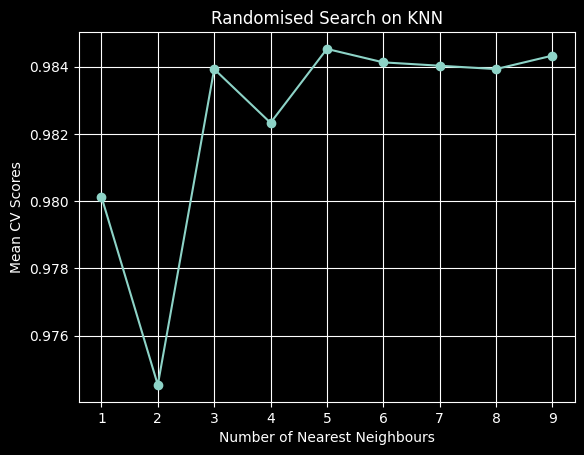

In [9]:
rs_df = pd.DataFrame(random_search.cv_results_)[['mean_test_score','params']]
plt.plot(k_list,rs_df.mean_test_score, marker = 'o')
plt.xlabel('Number of Nearest Neighbours')
plt.ylabel('Mean CV Scores')
plt.title('Randomised Search on KNN')
plt.grid()

In [10]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_model, params, cv = 5, scoring = 'accuracy', n_jobs= -1)
grid_search.fit(X_test, y_test.ravel())

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

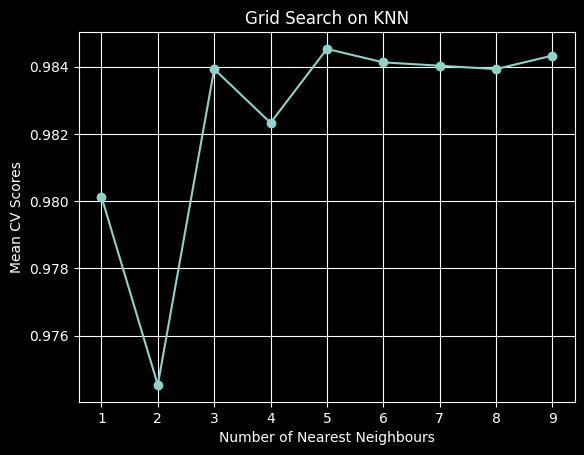

In [11]:
rs_df = pd.DataFrame(grid_search.cv_results_)[['mean_test_score','params']]
plt.plot(k_list,rs_df.mean_test_score, marker = 'o')
plt.xlabel('Number of Nearest Neighbours')
plt.ylabel('Mean CV Scores')
plt.title('Grid Search on KNN')
plt.grid()

In [12]:
print("Randomised Search")
print("The Best Accuracy of the Model is: {:.3f}".format(random_search.best_score_))
print("With Parameters: ", random_search.best_params_)
print("-----" *5)
print("Grid Search")
print("The Best Accuracy of the Model is: {:.3f}".format(grid_search.best_score_))
print("With Parameters: ", grid_search.best_params_)

Randomised Search
The Best Accuracy of the Model is: 0.985
With Parameters:  {'n_neighbors': 5}
-------------------------
Grid Search
The Best Accuracy of the Model is: 0.985
With Parameters:  {'n_neighbors': 5}


In [13]:
value = list(random_search.best_params_.values())[:2]
best_knn_model = KNeighborsClassifier(n_neighbors=value[0])
best_knn_model.fit(X_train_scaled, y_train)
score = cross_val_score(best_knn_model, X_train, y_train, cv=4, scoring="accuracy")
print(score)

[0.98545455 0.98909091 0.97454545 0.98363636]


In [14]:
print("Average Cross Validation Model Accuracy: {:.3f}".format(score.mean()))

Average Cross Validation Model Accuracy: 0.983


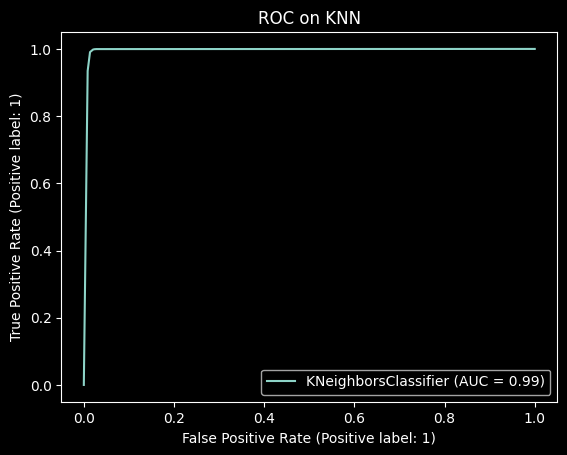

In [15]:
from sklearn import metrics
metrics.plot_roc_curve(best_knn_model, X_test_scaled, y_test) 
plt.title('ROC on KNN')
plt.show()

In [16]:
y_pred = knn_model_scaled.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)

<AxesSubplot: title={'center': 'Confusion Matrix of KNN'}>

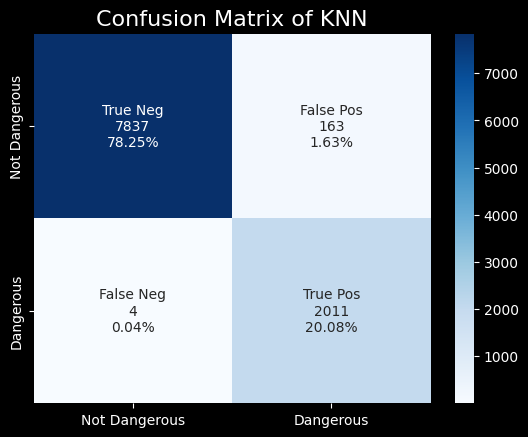

In [17]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
df = pd.DataFrame(cfm, ["Not Dangerous","Dangerous"], ["Not Dangerous","Dangerous"])
plt.title("Confusion Matrix of KNN", fontsize =16)
sns.heatmap(df, annot=labels,  fmt="", cmap='Blues')

In [18]:
from sklearn.metrics import classification_report
target_names = ['Not Dangerous', 'Dangerous']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Dangerous       1.00      0.98      0.99      8000
    Dangerous       0.93      1.00      0.96      2015

     accuracy                           0.98     10015
    macro avg       0.96      0.99      0.97     10015
 weighted avg       0.98      0.98      0.98     10015

